In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  int64  
 1   Date Rptd       1004847 non-null  object 
 2   DATE OCC        1004847 non-null  object 
 3   TIME OCC        1004847 non-null  int64  
 4   AREA            1004847 non-null  int64  
 5   AREA NAME       1004847 non-null  object 
 6   Rpt Dist No     1004847 non-null  int64  
 7   Part 1-2        1004847 non-null  int64  
 8   Crm Cd          1004847 non-null  int64  
 9   Crm Cd Desc     1004847 non-null  object 
 10  Mocodes         853256 non-null   object 
 11  Vict Age        1004847 non-null  int64  
 12  Vict Sex        860243 non-null   object 
 13  Vict Descent    860231 non-null   object 
 14  Premis Cd       1004831 non-null  float64
 15  Premis Desc     1004259 non-null  object 
 16  Weapon Used Cd  327193 non-null   fl

In [4]:
df.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151591
Vict Age                0
Vict Sex           144604
Vict Descent       144616
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677654
Weapon Desc        677654
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935717
Crm Cd 3          1002532
Crm Cd 4          1004783
LOCATION                0
Cross Street       850626
LAT                     0
LON                     0
dtype: int64

# Handling Null values 

In [5]:
for cols in df.select_dtypes(include='object').columns:
    df[cols]=df[cols].fillna(df[cols].mode()[0])

df.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes                 0
Vict Age                0
Vict Sex                0
Vict Descent            0
Premis Cd              16
Premis Desc             0
Weapon Used Cd     677654
Weapon Desc             0
Status                  0
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935717
Crm Cd 3          1002532
Crm Cd 4          1004783
LOCATION                0
Cross Street            0
LAT                     0
LON                     0
dtype: int64

In [6]:
for cols in df.select_dtypes(exclude='object').columns:
    df[cols]=df[cols].fillna(df[cols].mean())

df.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

# Converting Date into differnent columns

In [7]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Hour'] = df['TIME OCC'] // 100  # Convert HHMM format to hours
df['Month'] = df['DATE OCC'].dt.month
df['DayOfWeek'] = df['DATE OCC'].dt.weekday
df['Year'] = df['DATE OCC'].dt.year

In [8]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Hour,Month,DayOfWeek,Year
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,984.02203,991.21875,1900 S LONGWOOD AV,BROADWAY,34.0375,-118.3506,21,3,6,2020
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,984.02203,991.21875,1000 S FLOWER ST,BROADWAY,34.0444,-118.2628,18,2,5,2020
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,984.02203,991.21875,1400 W 37TH ST,BROADWAY,34.0210,-118.3002,17,11,2,2020
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,984.02203,991.21875,14000 RIVERSIDE DR,BROADWAY,34.1576,-118.4387,20,3,1,2020
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,984.02203,991.21875,200 E AVENUE 28,BROADWAY,34.0820,-118.2130,6,9,2,2020


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 32 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1004847 non-null  int64         
 1   Date Rptd       1004847 non-null  object        
 2   DATE OCC        1004847 non-null  datetime64[ns]
 3   TIME OCC        1004847 non-null  int64         
 4   AREA            1004847 non-null  int64         
 5   AREA NAME       1004847 non-null  object        
 6   Rpt Dist No     1004847 non-null  int64         
 7   Part 1-2        1004847 non-null  int64         
 8   Crm Cd          1004847 non-null  int64         
 9   Crm Cd Desc     1004847 non-null  object        
 10  Mocodes         1004847 non-null  object        
 11  Vict Age        1004847 non-null  int64         
 12  Vict Sex        1004847 non-null  object        
 13  Vict Descent    1004847 non-null  object        
 14  Premis Cd       10

# Drop columns 

In [10]:
df=df.drop(['DR_NO','Date Rptd','DATE OCC'],axis=1)

# EDA

Text(0, 0.5, 'Count')

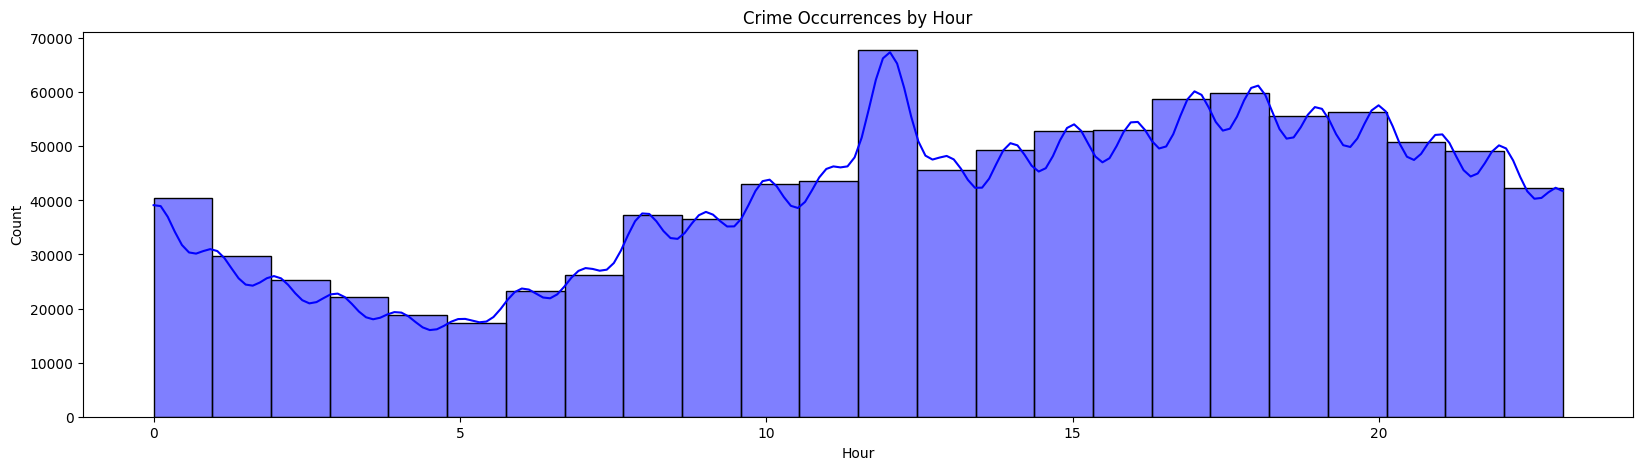

In [11]:
plt.figure(figsize=(20, 5))

sns.histplot(df['Hour'], bins=24, kde=True, color="blue")
plt.title("Crime Occurrences by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

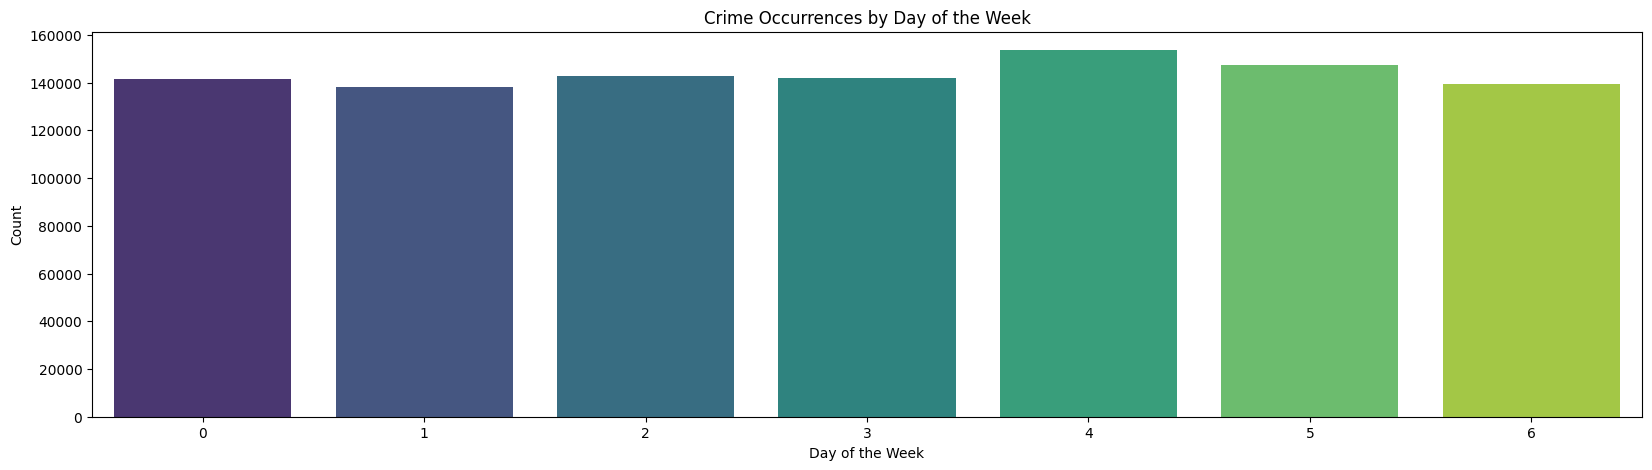

In [12]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['DayOfWeek'], palette="viridis")
plt.title("Crime Occurrences by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")

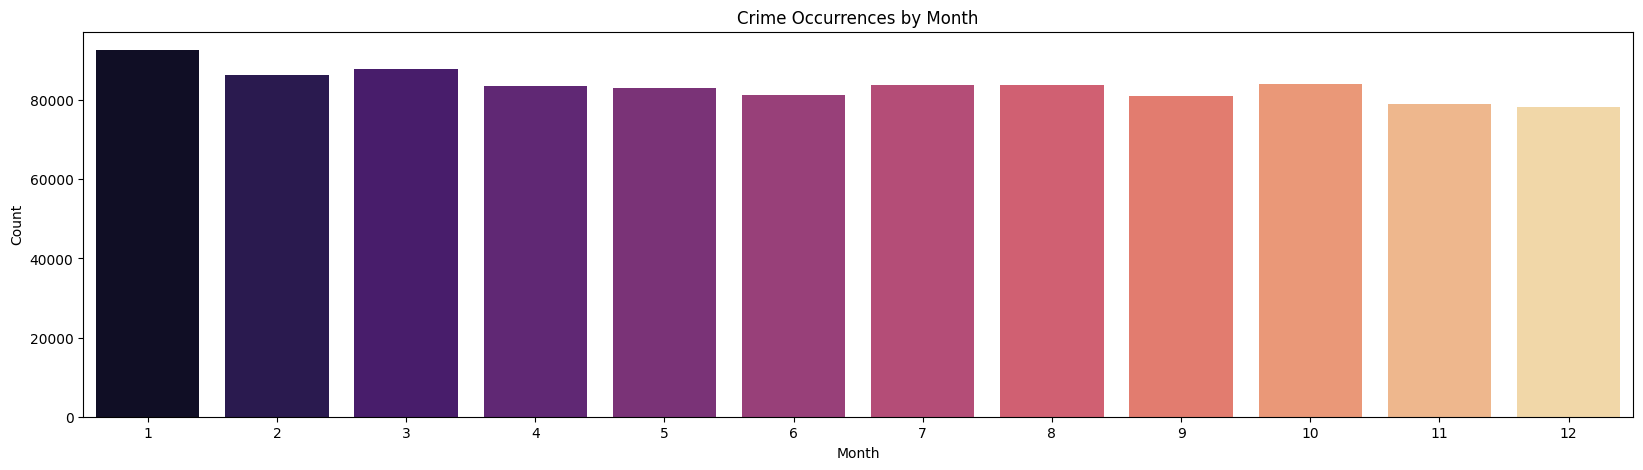

In [13]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['Month'], palette="magma")
plt.title("Crime Occurrences by Month")
plt.xlabel("Month")
plt.ylabel("Count")

plt.show()

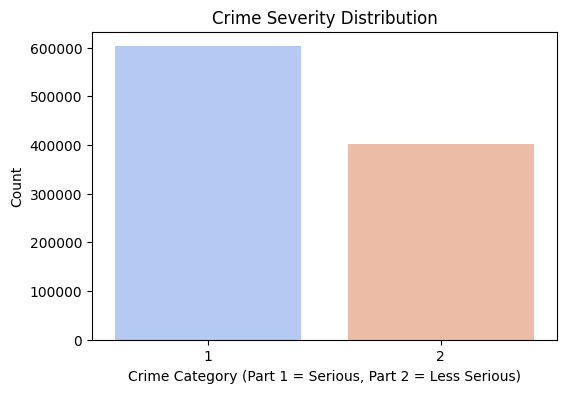

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Part 1-2'], palette="coolwarm")
plt.title("Crime Severity Distribution")
plt.xlabel("Crime Category (Part 1 = Serious, Part 2 = Less Serious)")
plt.ylabel("Count")
plt.show()

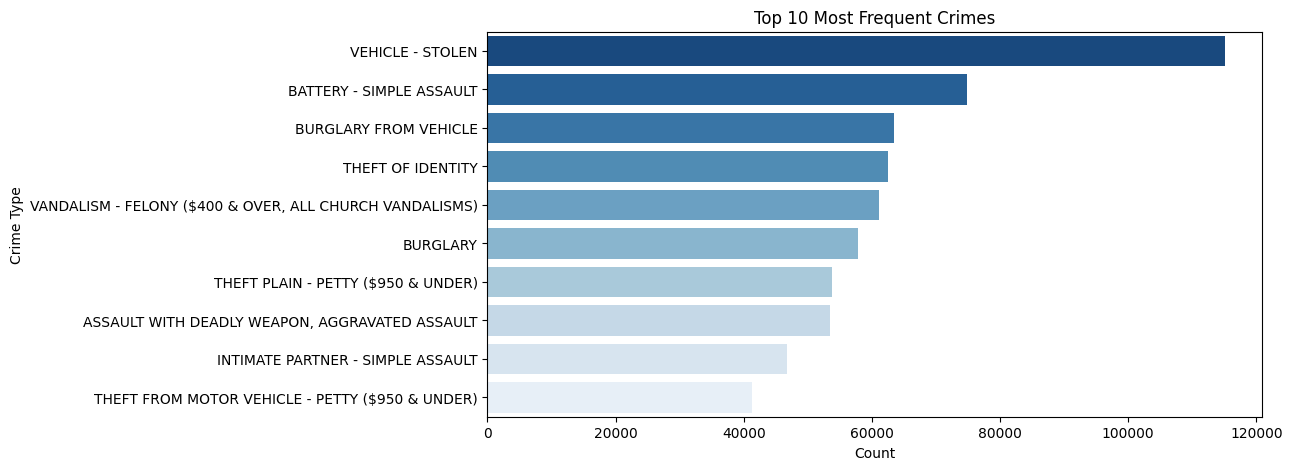

In [15]:
plt.figure(figsize=(10, 5))
top_crimes = df['Crm Cd Desc'].value_counts().head(10)
sns.barplot(y=top_crimes.index, x=top_crimes.values, palette="Blues_r")
plt.title("Top 10 Most Frequent Crimes")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()

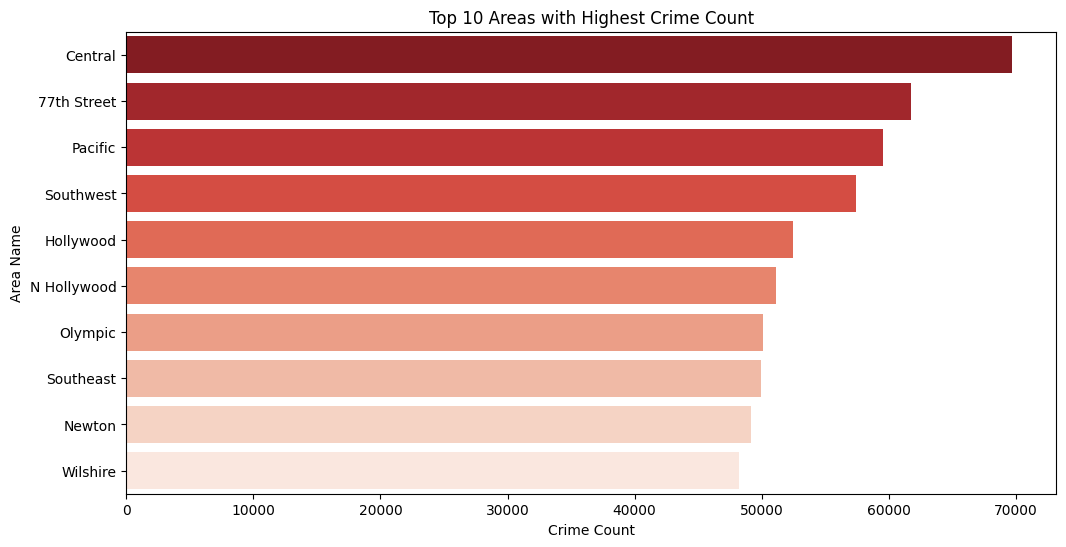

In [16]:
# Top 10 Areas with Most Crimes
plt.figure(figsize=(12, 6))
top_areas = df['AREA NAME'].value_counts().head(10)  # Get top 10 areas
sns.barplot(y=top_areas.index, x=top_areas.values, palette="Reds_r")
plt.title("Top 10 Areas with Highest Crime Count")
plt.xlabel("Crime Count")
plt.ylabel("Area Name")
plt.show()


# Victim Age Distribution

Text(0, 0.5, 'Count')

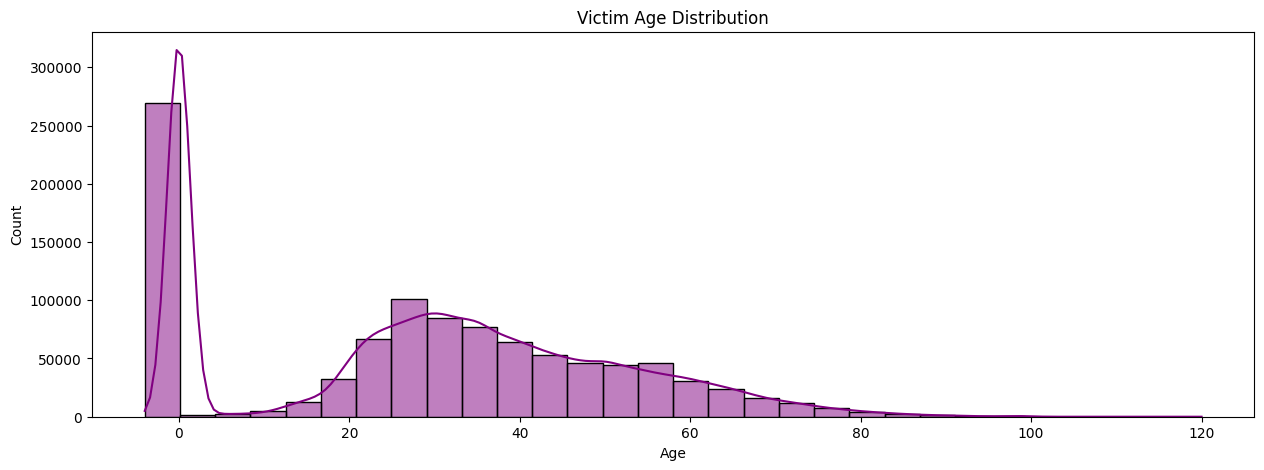

In [17]:
plt.figure(figsize=(15, 5))

sns.histplot(df['Vict Age'], bins=30, kde=True, color="purple")
plt.title("Victim Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

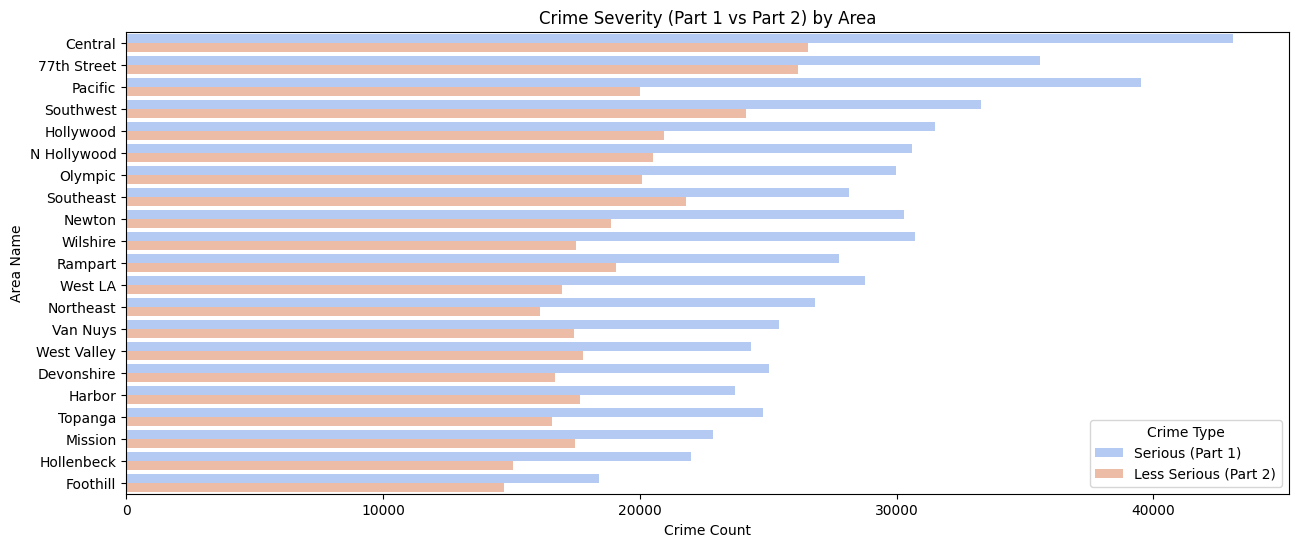

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(y=df['AREA NAME'], hue=df['Part 1-2'], order=df['AREA NAME'].value_counts().index, palette="coolwarm")
plt.title("Crime Severity (Part 1 vs Part 2) by Area")
plt.xlabel("Crime Count")
plt.ylabel("Area Name")
plt.legend(title="Crime Type", labels=["Serious (Part 1)", "Less Serious (Part 2)"])
plt.show()


# Different Crime Types in Specific Area

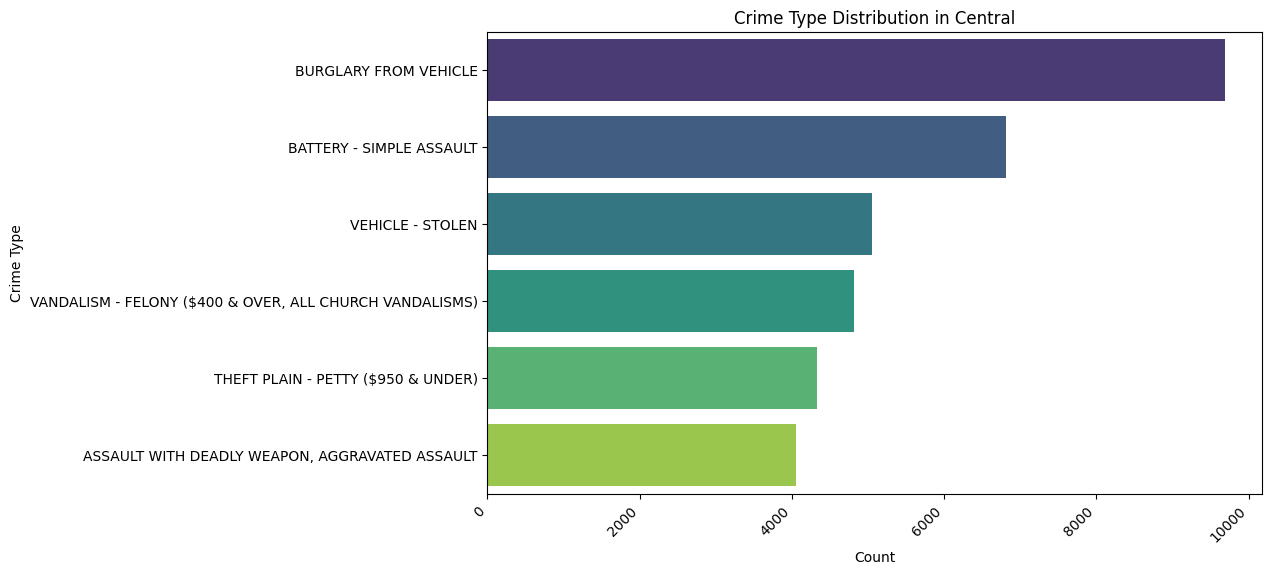

In [19]:
specific_area = 'Central'

# Filter data for the specific area
area_data = df[df['AREA NAME'] == specific_area]

# Count the occurrences of each crime type in that area
crime_counts = area_data['Crm Cd Desc'].value_counts().head(6)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot( x=crime_counts.values,y=crime_counts.index, palette='viridis')
plt.title(f"Crime Type Distribution in {specific_area}")
plt.ylabel("Crime Type")
plt.xlabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

# The year with the highest number of crimes

In [20]:
crime_count_per_year = df['Year'].value_counts()

# Find the year with the highest number of crimes
max_crime_year = crime_count_per_year.idxmax()
max_crime_count = crime_count_per_year.max()

print(f"The year with the highest number of crimes is {max_crime_year} with {max_crime_count} crimes.")


The year with the highest number of crimes is 2022 with 235252 crimes.


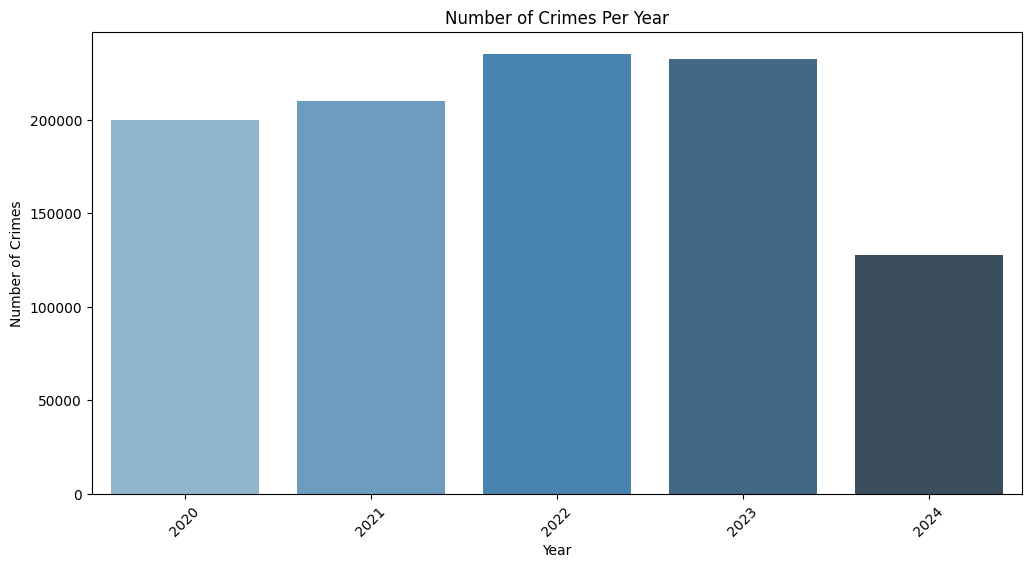

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_count_per_year.index, y=crime_count_per_year.values, palette='Blues_d')
plt.title("Number of Crimes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

# The Age With Highst Crime Records

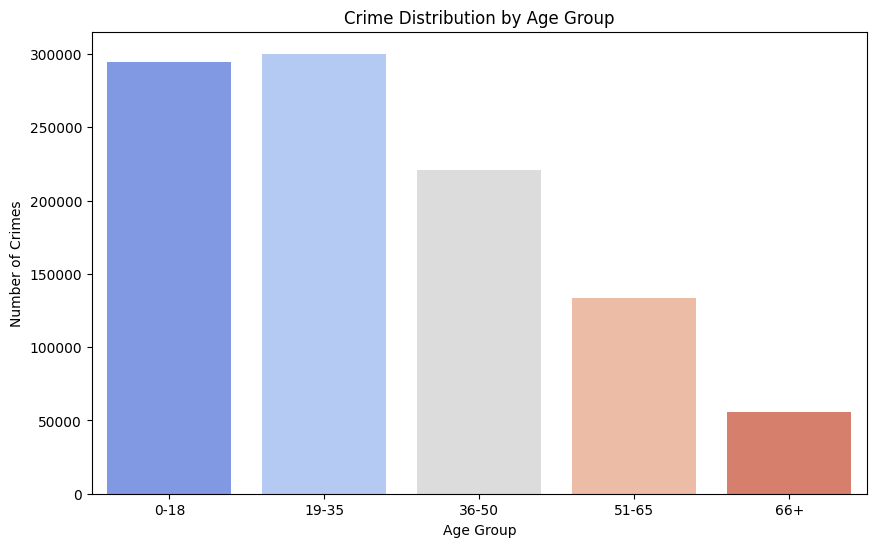

In [22]:
bins = [0, 18, 35, 50, 65, 100]  
labels = ['0-18', '19-35', '36-50', '51-65', '66+']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)

# Count the number of crimes in each age group
age_group_crime_counts = df['Age Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_crime_counts.index, y=age_group_crime_counts.values, palette='coolwarm')
plt.title("Crime Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.show()
